# Resultados del análisis de sentimientos aplicado

1. Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from analisis_sentimiento import clasificar_sentimiento, detectar_tema

2. Verificación del dataset a utilizar

In [2]:
df = pd.read_csv("../../data/processed/youtube_comments_clean.csv")
df.head()

,video_id,comment_id,text,author,likes,published_at,is_reply,text_clean,year,month,day,text_length,lang_detected,text_translated
0,9flte56erE8,UgySB0dkRPOL4UmHDdN4AaABAg,Bro the released date is 2 June not 5,@FirashMarzelan,0,2025-12-12 06:36:34+00:00,False,bro the released date is 2 june not 5,2025,12,12,37,en,bro the released date is 2 june not 5
1,9flte56erE8,UgzprNz-M-yQmHCAoXx4AaABAg,Awesome,@HappyAlamina,0,2025-12-12 00:21:15+00:00,False,awesome,2025,12,12,7,unknown,awesome
2,9flte56erE8,Ugxa8lfkjfdfl1vNMOV4AaABAg,we have lot of money so new pc console,@kj-b8z,0,2025-12-07 01:53:15+00:00,False,we have lot of money so new pc console,2025,12,7,38,en,we have lot of money so new pc console
3,9flte56erE8,UgzIydODhfoZBZOLLJd4AaABAg,"I brought it for ฿15,000\n😢",@Buderman14,0,2025-12-06 00:04:27+00:00,False,i brought it for 15000,2025,12,6,22,en,i brought it for 15000
4,9flte56erE8,UgwPjwxGcoea80VIeY54AaABAg,I have it😂,@BraydeHodson,1,2025-12-01 06:32:28+00:00,False,i have it,2025,12,1,9,no,i have it


3. Aplica la categorización por tipo de sentimiento y cuenta cuántos comentarios están en cada categoría

In [3]:
df[["sentiment_score", "sentiment_label"]] = df["text_translated"].apply(
    lambda x: pd.Series(clasificar_sentimiento(x))
)

df["sentiment_label"].value_counts()


sentiment_label
neutral     7640
positivo    4086
negativo    2192
Name: count, dtype: int64

4. Aplica los temas y cuenta cuántos comentarios son de cada tema

In [4]:
df["tema"] = df["text_translated"].apply(detectar_tema)
df["tema"].value_counts()


tema
otros        8880
precio       2698
mejoras      1326
hype          651
decepcion     326
opinion        37
Name: count, dtype: int64

5. Unión de los temas con su respectiva categorización dependiendo de si son positivos, negativos o neutros

In [5]:
sentimiento_tema = (
    df.groupby(["tema", "sentiment_label"])
    .size()
    .reset_index(name="count")
)

sentimiento_tema


,tema,sentiment_label,count
0,decepcion,negativo,194
1,decepcion,neutral,89
2,decepcion,positivo,43
3,hype,negativo,30
4,hype,neutral,254
5,hype,positivo,367
6,mejoras,negativo,147
7,mejoras,neutral,523
8,mejoras,positivo,656
9,opinion,negativo,8


6. Manejo de gráficos
 #### Cuántos comentarios están distribuidos en cada tema

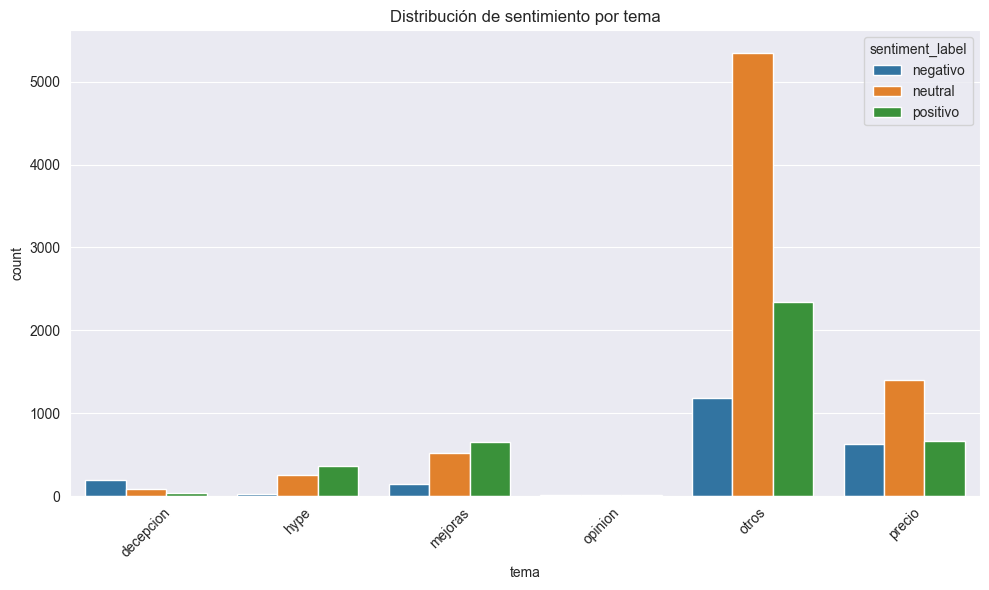

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=sentimiento_tema,
    x="tema",
    y="count",
    hue="sentiment_label"
)
plt.title("Distribución de sentimiento por tema")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Temas con mejor puntuación según el análisis

In [7]:
df.groupby("tema")["sentiment_score"].mean().sort_values()


tema
decepcion   -0.268672
precio      -0.007441
opinion      0.046341
otros        0.054145
mejoras      0.145107
hype         0.251929
Name: sentiment_score, dtype: float64

7. Guardado del nuevo dataset con los datos del análisis final

In [8]:
# Guardar dataset final procesado

output_path = "../../data/processed/analisis_procesado.csv"

df.to_csv(
    output_path,
    index=False,
    encoding="utf-8-sig"
)

print("Dataset final guardado")
print(f"Total de registros: {len(df)}")
print("Columnas finales:")
display(df.columns)


Dataset final guardado
Total de registros: 13918
Columnas finales:


Index(['video_id', 'comment_id', 'text', 'author', 'likes', 'published_at',
       'is_reply', 'text_clean', 'year', 'month', 'day', 'text_length',
       'lang_detected', 'text_translated', 'sentiment_score',
       'sentiment_label', 'tema'],
      dtype='object')